# Falied 1D equalization analysis

Analysis: Equalizing U forces traps to be deeper in the center, thus causing WFs centered in the middle but not the site.

When traps are more uniform, V is more even but U is not. U tends to be larger at the edge, and when you flatten trap depths, U is less even.

Equalizing U pushes trap depths uneven and edges shallower than bulk, then a good solution to avoid non-local WF and thus spikes in equalization is to make spacing larger.

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 4
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, (930, 1250)),
                 lc=(1450, 1550),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=2)

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=(930, 1250)nm
lattice: lattice shape is square
lattice: Full lattice sizes: [4 1]
lattice: lattice constants: [1.55913978]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[35 20 20] is set.
DVR: R0=[5.33870968 3.         7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction: None.
Equalize: method: trf
Equalize: quantities: UT

Equalize: trap depths equalzlied to [1.01553335 0.99988122 0.99988122 1.01553335].
H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.54s.
H_solver: eigenstates memory usage:  0.48 MiB.
H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1]

H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.50s.
H_solver: eigenstates memory usage:  0.48 MiB.
H_op: n=[35 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.58s.
H_solver: eigenstates memory usage:  0.47 MiB.
Energies: [-1.04982554 -1.03741005 -0.96855422 -0.96819179 -0.96493717 -0.94690077
 -0.89615593 -0.87610214]
parities: [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
Single band optimization time: 0.0009400844573974609s.
Calculate U.
Single band interaction time: 0.1558687686920166s.

Start to plot graph...


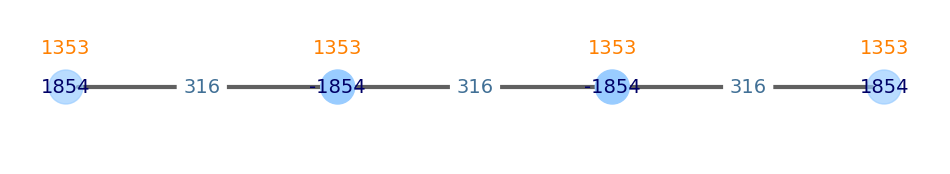

In [2]:
G.draw_graph()

### 4x1 chain no waist UT

Using original parameters in 1D Waseem experiment, since traps are too close the minimization is not working well and spikes are appearing.

Equalize: scale_factor is not a number. Set to None.


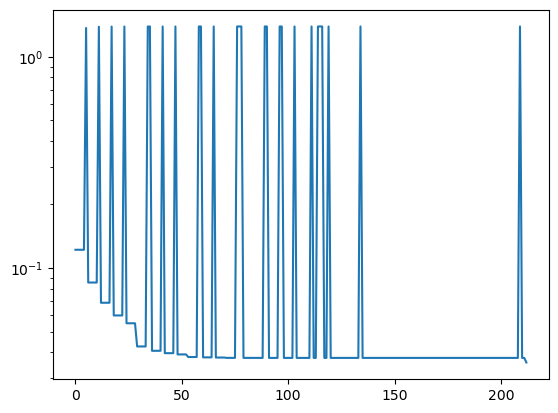

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 4
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, (930, 1250)),
                 lc=(1350, 1550),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")

import matplotlib.pyplot as plt

plt.plot(c, '-')
plt.yscale('log')

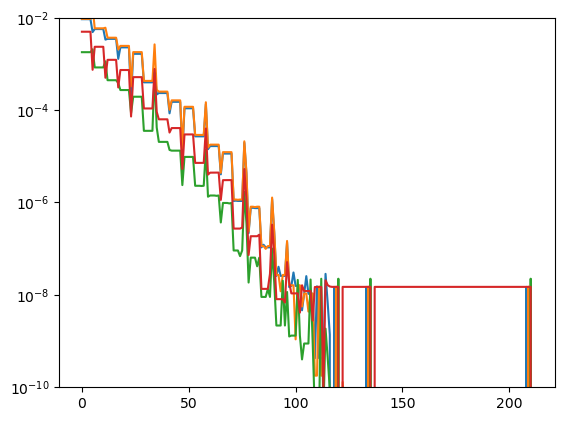

In [12]:
x = rep.a(report, "Equalization_Log", "x")

import matplotlib.pyplot as plt

plt.plot(abs(x - x[-1, :]), '-')
plt.ylim(1e-10, 1e-2)
plt.yscale('log')

In [5]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=1)
G.sf = .5828346670502005
E, W, p = G.eigen_basis()
G.verbosity = 0
G.A, G.U, U = G.singleband_Hubbard(
    u=True, offset=True, output_unitary=True, eig_sol=(E, W, p))
xlinks, ylinks, __, __ = G.xy_links(G.nn_tunneling(G.A))
Utarget = np.mean(G.U)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, None, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')


Equalize: 1-th equalization trap depths: [1. 1.]
Equalize: 1-th equalization trap centers:
[[-1.5  0. ]
 [-0.5  0. ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.64s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.60s.
H_solver: eigenstates memory usage:  0.46 MiB.
Energies: [-0.74260421 -0.72667058 -0.69900045 -0.69417615 -0.68066804 -0.6611698
 -0.62942329 -0.61591852]
parities: [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
V = [ 0.68827245 -0.68827245 -0.68827

##### i=6 case

In [6]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=6)
G.sf = .5828346670502005
E, W, p = G.eigen_basis()
G.verbosity = 0
G.A, G.U, U = G.singleband_Hubbard(
    u=True, offset=True, output_unitary=True, eig_sol=(E, W, p))
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')



Equalize: 6-th equalization trap depths: [0.98584936 1.0265185 ]
Equalize: 6-th equalization trap centers:
[[-1.50385881  0.        ]
 [-0.49429019  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.57s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.61s.
H_solver: eigenstates memory usage:  0.46 MiB.
Energies: [-0.76434176 -0.74290471 -0.70086495 -0.6887615  -0.68638228 -0.67352249
 -0.64830923 -0.61893023]
parities: [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1 

In [7]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=6)
G.sf = .5828346670502005
G.verbosity = 0
k = 10
p_list = G.build_sectors()
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E_sb, W_sb, p_sb = G.solve_sector(p, k, E_sb, W_sb, p_sb)

# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]
print(E_sb)
print(p_sb)


Equalize: 6-th equalization trap depths: [0.98584936 1.0265185 ]
Equalize: 6-th equalization trap centers:
[[-1.50385881  0.        ]
 [-0.49429019  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
[-0.76434176 -0.74290471 -0.70086495 -0.6887615  -0.68638228 -0.67352249
 -0.64830923 -0.61902417 -0.61893023 -0.60925858]
[[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]]


(-1.1, 0.0)

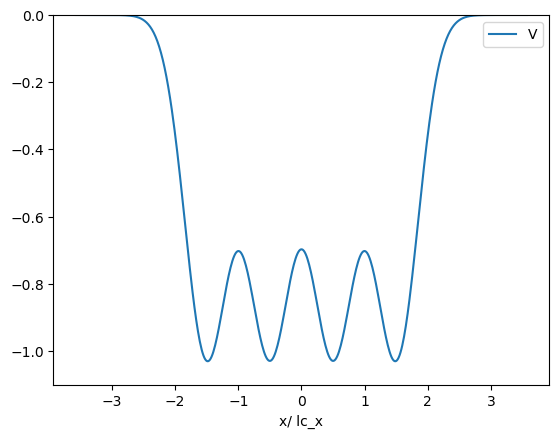

In [4]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

G.equalize_trap_depth()
x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.xlabel('x/ lc_x')
plt.legend()
plt.ylim(-1.1, -0)

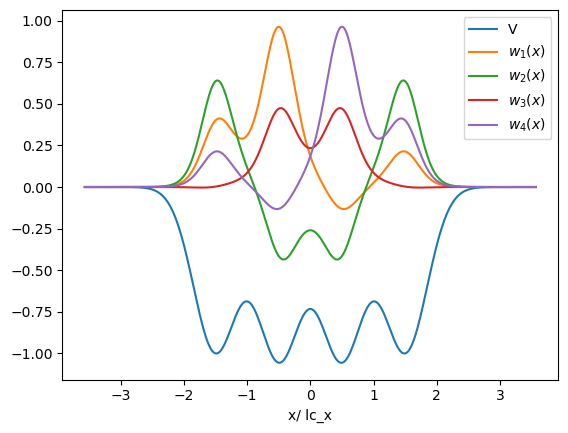

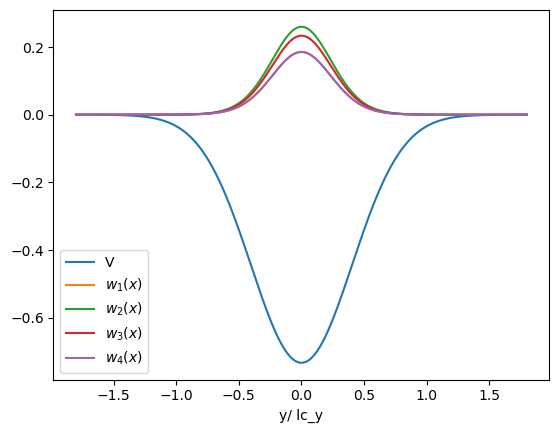

In [28]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.plot(x / G.lc[0],
         fix_phase(wannier_func([x, y, z], U, G, W[0], p[0])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('x/ lc_x')
plt.legend()

plt.figure()
x = np.array([0])
y = np.linspace(-G.R0[1], G.R0[1], 500)
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(y / G.lc[1], v[0, :, 0], label='V')
plt.plot(y / G.lc[1],
         fix_phase(wannier_func([x, y, z], U, G, W[0], p[0])[0, :, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('y/ lc_y')
plt.legend()


It hits a point that only 1 state is coming from $p_x=-1$ sector.

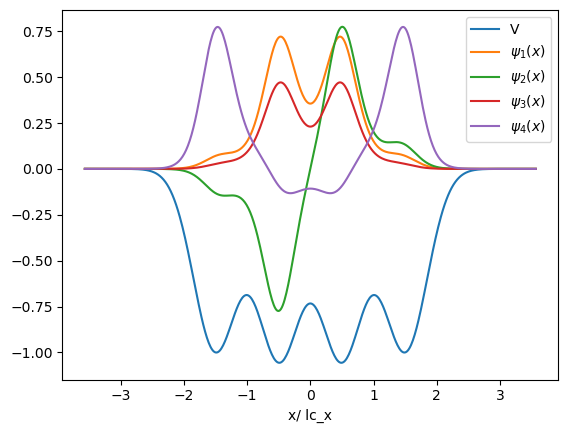

In [25]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
for i in range(p[0].shape[0]):
    plt.plot(x / G.lc[0],
             fix_phase(psi([x, y, z], G.n, G.dx, W[0]
                       [i], p[0][i, :])[:, 0, 0, 0]),
             label=f'$\psi_{i + 1}(x)$')
plt.xlabel('x/ lc_x')
plt.legend()


In [24]:
W0 = W[0][0].flatten()
W2 = W[0][2].flatten()
W0.T @ W2

1.3530402317846467e-16

In [5]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=6)
G.sf = .5828346670502005
G.Voff[0] += 1e-3
E, W, p = G.eigen_basis()
G.verbosity = 0
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')



Equalize: 6-th equalization trap depths: [0.98584936 1.0265185 ]
Equalize: 6-th equalization trap centers:
[[-1.50385881  0.        ]
 [-0.49429019  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.73s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.77s.
H_solver: eigenstates memory usage:  0.46 MiB.
Energies: [-0.76434176 -0.74290471 -0.70086501 -0.6887615  -0.68638228 -0.67352249
 -0.64830954 -0.61893025]
parities: [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1 

When I perturb it a little bit, it remains there with quite singular low energy space.

##### i=7

Since the step from i=6 to i=7 is big, so the qualitative behavior is different.

In [8]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=7)
G.sf = .5828346670502005
E, W, p = G.eigen_basis()
G.verbosity = 0
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')



Equalize: 7-th equalization trap depths: [0.99638857 1.00353683]
Equalize: 7-th equalization trap centers:
[[-1.50095374  0.        ]
 [-0.49737937  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.60s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.75s.
H_solver: eigenstates memory usage:  0.46 MiB.
Energies: [-0.74577916 -0.72773668 -0.69608361 -0.69205123 -0.68371583 -0.661587
 -0.63233328 -0.61445613]
parities: [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1

#### i=135 case

In [7]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=135)
G.sf = .5828346670502005
E, W, p = G.eigen_basis()
G.verbosity = 0
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')



Equalize: 135-th equalization trap depths: [0.9907222  1.00942329]
Equalize: 135-th equalization trap centers:
[[-1.50179138  0.        ]
 [-0.49503487  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.80s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.80s.
H_solver: eigenstates memory usage:  0.46 MiB.
Energies: [-0.75090875 -0.73079349 -0.69177619 -0.68852748 -0.68852748 -0.66361089
 -0.6368697  -0.6128695 ]
parities: [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]
 [ 1  1  1]
 

In [11]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=135)
G.sf = .5828346670502005
G.verbosity = 0
k = 10
p_list = G.build_sectors()
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E_sb, W_sb, p_sb = G.solve_sector(p, k, E_sb, W_sb, p_sb)

# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]
print(E_sb)
print(p_sb)


Equalize: 135-th equalization trap depths: [0.9907222  1.00942329]
Equalize: 135-th equalization trap centers:
[[-1.50179138  0.        ]
 [-0.49503487  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
[-0.75090875 -0.73079349 -0.69177619 -0.68852748 -0.68852748 -0.66361089
 -0.6368697  -0.62027768 -0.6128695  -0.60773255]
[[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [-1  1  1]]


The 4-th and 5-th sates are degenerate.

i=136

In [13]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=136)
G.sf = .5828346670502005
E, W, p = G.eigen_basis()
G.verbosity = 0
G.singleband_Hubbard(u=True, offset=True)
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')
print(f'E = {E}')
print(f'parity = {p}')


Equalize: 136-th equalization trap depths: [0.9907222  1.00942327]
Equalize: 136-th equalization trap centers:
[[-1.5017914   0.        ]
 [-0.49503487  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.59s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.67s.
H_solver: eigenstates memory usage:  0.46 MiB.
V = [ 1.10366766 -1.10366766 -1.10366766  1.10366766]
t = [0.59273916 0.56979134 0.59273916]
U = [0.97939475 0.94379657 0.94379657 0.97939475]
V_err = 1.8936204778785994
t_err = 0.01895954722250993
U_err 

In [14]:
G.verbosity = 1
G = read_equalizatśon_log(report, G, index=136)
G.sf = .5828346670502005
G.verbosity = 0
k = 10
p_list = G.build_sectors()
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E_sb, W_sb, p_sb = G.solve_sector(p, k, E_sb, W_sb, p_sb)

# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]
print(E_sb)
print(p_sb)



Equalize: 136-th equalization trap depths: [0.9907222  1.00942327]
Equalize: 136-th equalization trap centers:
[[-1.5017914   0.        ]
 [-0.49503487  0.        ]]
lattice: Full lattice sizes updated to: [4 1 1]
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.67s.
H_solver: eigenstates memory usage:  0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.76s.
H_solver: eigenstates memory usage:  0.46 MiB.
[-0.75090873 -0.73079348 -0.69177618 -0.68852747 -0.68852747 -0.66361087
 -0.63686969 -0.62027767 -0.61286949 -0.60773253]
[[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  

## 6x1 chain no waist UT

Equalize: scale_factor is not a number. Set to None.


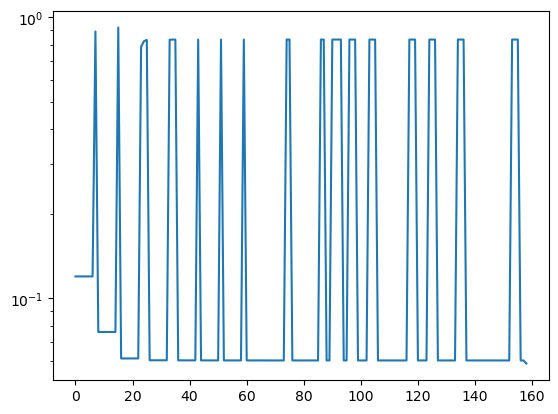

In [5]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 6
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, (930, 1250)),
                 lc=(1350, 1550),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=0)
fn = f'../output/Convergence analysis/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini'
report = rep.get_report(fn)
G.U, G.A = read_Hubbard(report)
c = rep.a(report, "Equalization_Log", "cost_func_value")

import matplotlib.pyplot as plt

plt.plot(c, '-')
plt.yscale('log')

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
L = 6
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'UT'
meth = 'trf'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, Ly], dtype=int),
                 trap=(50, (930, 1250)),
                 lc=(1500, 1550),
                 ascatt=1770,
                 laser=770,
                 band=1,
                 dim=d,
                 avg=1,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=True,
                 eqtarget=eqt,
                 method=meth,
                 symmetry=True,
                 verbosity=2)

DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=(930, 1250)nm
lattice: lattice shape is square
lattice: Full lattice sizes: [6 1]
lattice: lattice constants: [1.61290323]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[37 16 16] is set.
DVR: R0=[7.03225806 3.         7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.
Equalize: varying waist direction: None.
Equalize: method: trf
Equalize: quantities: UT

Equalize: trap depths equalzlied to [1.01103162 0.99993949 1.00000033 1.00000033 0.99993949 1.01103162].
H_op: n=[37 16 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.63s.
H_solver: eigenstates memory usage:  0.50 MiB.
H_op: 

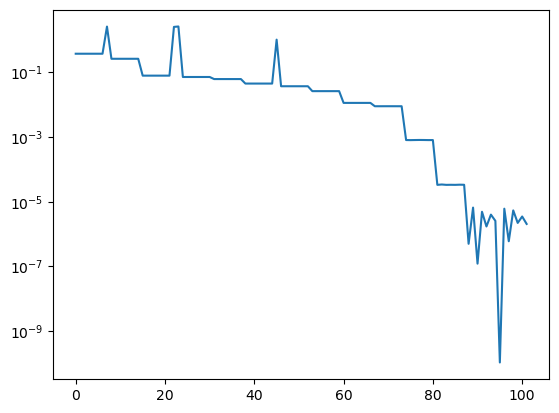

In [2]:
plt.plot(G.eqinfo['fval'], '-')
plt.yscale('log')


In [3]:
G.param_unfold(G.eqinfo['x'][0])
G.singleband_Hubbard(u=True, offset=True)
xlinks, ylinks = G.xy_links()
G.sf, __ = G.t_target(G.nn_tunneling(G.A), xlinks, ylinks, np.min)
Utarget = np.max(G.U)



Equalize: current trap depths: [1.01103162 0.99993949 1.00000033]
Equalize: current trap centers:
[[-2.5  0. ]
 [-1.5  0. ]
 [-0.5  0. ]]
lattice: Full lattice sizes updated to: [6 1 1]
lattice: lattice constants updated to: [1.61290323 1.66666667 1.61290323]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[37 16 16] is set.
DVR: R0=[7.03225806 3.         7.2       ]w is set.
H_op: n=[37 16 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.41s.
H_solver: eigenstates memory usage:  0.50 MiB.
H_op: n=[37 16 16] dx=[0.1875 0.1875 0.45  ]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.42s.
H_solver: eigenstates memory usage:  0.49 MiB.
Energies: [-0.7007799  -0.69798377 -0.6936819  -0.68883327 -0.68484808 -0.6837817
 -0.6293430

In [7]:
G.param_unfold(G.eqinfo['x'][-1])
E, W, p = G.eigen_basis()
G.verbosity = 0
G.A, G.U, U = G.singleband_Hubbard(
    u=True, offset=True, output_unitary=True, eig_sol=(E, W, p))
cv = np.sqrt(G.v_cost_func(G.A, None, G.sf))
ct = np.sqrt(G.t_cost_func(G.A, (xlinks, ylinks), (G.sf, None)))
cu = np.sqrt(G.u_cost_func(G.U, Utarget, G.sf))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
cvec = np.array((cu, ct, cv))**2
c = np.array([True, True, False]) @ cvec
fval = np.sqrt(c)
print(f'fval = {fval}')



Equalize: current trap depths: [1.04358975 1.0908137  1.10743399]
Equalize: current trap centers:
[[-2.48281244  0.        ]
 [-1.47882115  0.        ]
 [-0.49203342  0.        ]]
lattice: Full lattice sizes updated to: [6 1 1]
lattice: lattice constants updated to: [1.61290323 1.66666667 1.61290323]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[37 16 16] is set.
DVR: R0=[7.03225806 3.         7.2       ]w is set.
H_op: n=[37 16 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.44s.
H_solver: eigenstates memory usage:  0.50 MiB.
H_op: n=[37 16 16] dx=[0.1875 0.1875 0.45  ]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 6 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.48s.
H_solver: eigenstates memory usage:  0.49 MiB.
Energies: [-0.79179073 -0.78381077 -0.76939438 -0.7

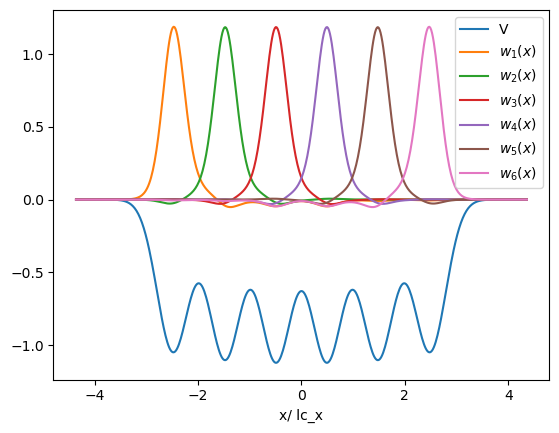

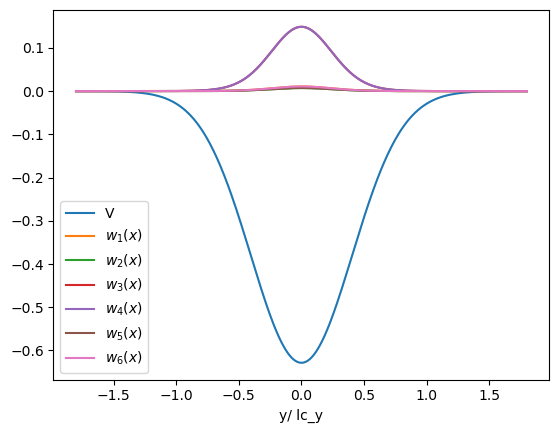

In [8]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(x / G.lc[0], v[:, 0, 0], label='V')
plt.plot(x / G.lc[0],
         fix_phase(wannier_func([x, y, z], U, G, W[0], p[0])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('x/ lc_x')
plt.legend()

plt.figure()
x = np.array([0])
y = np.linspace(-G.R0[1], G.R0[1], 500)
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = G.Vfun(*X)
plt.plot(y / G.lc[1], v[0, :, 0], label='V')
plt.plot(y / G.lc[1],
         fix_phase(wannier_func([x, y, z], U, G, W[0], p[0])[0, :, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(G.Nsite)))
plt.xlabel('y/ lc_y')
plt.legend()
